# Bosten Housing Prices

## General
Housing Values in Suburbs of Boston. The **medv** variable is the target variable. <br>

<img  style="width:500px;height:300px;"src="house_pig.jpg" alt="Boston house">
<p>Source: http://www.houseandhammer.com/wp-content/uploads/2016/11/11cudworthmedford-750x429.jpg </p>

## Data description
The Boston data frame has 506 rows and 14 columns.This data frame contains the following columns:<br>
<ul>
 <li>
     **crim**: per capita crime rate by town.
 </li>
 <li>
     **zn**: proportion of residential land zoned for lots over 25,000 sq.ft.
 </li>
 <li>
     **indus**: proportion of non-retail business acres per town.
 </li>
 <li>
     **chas**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
 </li>
 <li>
     **nox**: nitrogen oxides concentration (parts per 10 million).
 </li>
 <li>
     **rm**:average number of rooms per dwelling.
 </li>
 <li>
     **age**: proportion of owner-occupied units built prior to 1940.
 </li>
 <li>
     **dis **: weighted mean of distances to five Boston employment centres.
 </li>
 <li> 
     **rad**: index of accessibility to radial highways.
 </li>
 <li>
     **tax**: full-value property-tax rate per  \$10,000.
 </li>
 <li>
 **ptratio **: pupil-teacher ratio by town.
 </li>
 <li>
 **black **: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
 </li>
 <li>
 **lstat **: lower status of the population (percent).
 </li>
 <li>
 **medv **: median value of owner-occupied homes in \$1000s.
</ul>

 **Source **
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.
Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.




In [4]:
#1.1Step: Import libraries which are necessary for this project

import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.display import display, HTML


#1.3.Step: For a nice display in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline

#1.4.Step: Preprocessing
from sklearn.datasets import load_boston
boston = load_boston()
boston.feature_names 
lower_case = lambda x:x.lower()
func_lower = np.vectorize(lower_case)
feature_names = func_lower(boston.feature_names)
print(feature_names)
boston = load_boston()
df_boston = pd.DataFrame(boston.data, columns=feature_names)
df_boston['medv'] = pd.Series(boston.target)
df_boston.head()

display(df_boston.describe())


['crim' 'zn' 'indus' 'chas' 'nox' 'rm' 'age' 'dis' 'rad' 'tax' 'ptratio'
 'b' 'lstat']


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Data Exploration

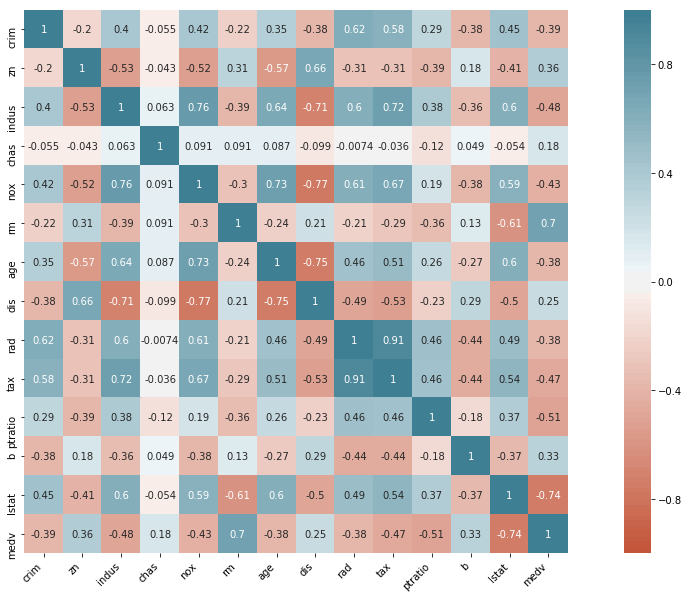

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.385832
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
b          0.333461
zn         0.360445
rm         0.695360
medv       1.000000
Name: medv, dtype: float64

rm         0.695360
ptratio   -0.507787
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

In [42]:
plt.figure(figsize=(20,10))
corr = df_boston.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=100),
    annot=True, 
    fmt='.2g',
    square=True,

)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

correlations = df_boston.corr()
correlations = correlations['medv']
display(HTML('''
<p>For the first try the Pearson correlation will be used to measure the corrleation. The Pearson coefficient has values between -1 to 1 </p>
<ul>
    <li>0: A value close to zeroe imples a weak correlation. A value of exact 0 impliess no correlation.</li>
    <li>-1: a value close to -1 implies a strong negativ correlation</li>
    <li>+1: a value close to +1 implies a strong postiv correlation</li>
</ul>

'''))

display(
    correlations.sort_values()
)

#Step: Selecting only the relevant features

relevant_feat = correlations[(correlations>0.5) | (correlations<-0.5)]

display(HTML("""<h3> Relevant features </h3>"""))
display(relevant_feat)

display(
    HTML("""
        <h3> Finding </h3>
        You can see that feature's: <br>
        <ul>
        <li>lstat  [lower status of the population (percent)] 
        </li><li>
        rm (average number of rooms)
        </li><li>
        ptratio (pupil-teacher ratio by town. )
        </li>
        </ul>
        correlates quite strongly to the medv. However  inorder to be ableu the use Pearson Correlation the <br>
        the following assumptions need to be checked
        <ol>
            <li>continuous variables</li>
            <li>Cases that have values on both variables</li>
            <li>Linear relationship between the variables</li>
            <li>Independent cases (i.e., independence of observations) </li>
            <li>Bivariate normality </li>
            <li>Random sample of data from the population</li>
            <li>No outliers</li>
        </ol>
        Source: https://libguides.library.kent.edu/SPSS/PearsonCorr
        
        """
        )
)






In [48]:
#todo: Write the reasons

display(
    HTML("""
        <h3> Check  linear assumptions </h3>
        <ol>
            <li>continuous variables <br> <b>Fulfilled </b>: </li>
           
            <li>Cases that have values on both variables <br> <b>Fulfilled </b></li>
            <li>Linear relationship between the variable s<br> <b>Fulfilled </b></li>
            <li>Independent cases (i.e., independence of observations)<br> <b>need to be investigated further </b></li>
            <li>Bivariate normality <br> <b>need to be investigated further </b></li> </li>
            <li>Random sample of data from the population <br> <b>Fulfilled </b></li>
            <li>No outliers <br> <b>need to be investigated further </b> </li>
        </ol>
        Source: https://libguides.library.kent.edu/SPSS/PearsonCorr
        
        """
        )
)

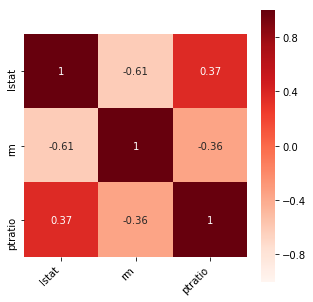

In [40]:
display(HTML("""
<h5>Let explore the correlation between the independent variables </h5>
"""))
plt.figure(figsize=(5,5))
corr = df_boston[["lstat","rm","ptratio"]].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=plt.cm.Reds,
    annot=True, 
    fmt='.2g',
    square=True,

)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()


display(HTML("""
<h5>Findings</h5>
<P>As we can see the RM and LSTAT are strongly correlated with each other, <br>
therefore I will only keep LSTAT because its correlation coefficient with medv is higher. I will also keep PTRATIO <br>
because the PC value is below 0.5</p>
"""))

In [60]:
display(HTML(
"""
<h3>Multilinear regression</h3>
<p>Prior I identify the most relevant feature to determine the target feature (medv). In this section I will build a 
multilinear regression, in order to find out how good the identify variable explaine the target var.</p>
"""
))

#todo: Complete this section

display(HTML(
"""
<h3>Multilinear regression</h3>


<p>Find a a multilinear model based on: </p>
<ol>
    <li>Just use all features 
    
    </li>
    <li>Backwards Elimination
        <ol>
            <li>Fit model with all possible features</li>
            <li>Order the features according the P-Value</li>
            <li>Remove the feature with the highest P-Value, if the p-value is higher than 5%. <br> If
            no P-Value is higher than 5% the model is finished</li>
            <li>Refit the model, and go two steps back</li>
        </ol>
    </li>
    <li>Forward Selection
        <ol>
            <li>#Uncomplete</li>
        </ol>
    </li>   
    <li>Bidirectional Selection
        <ol>
            <li>#Uncomplete</li>
        </ol>
    </li>  
    <li>Sorce Comparision
        <ol>
            <li>#Uncomplete</li>
        </ol>
    </li>  
</ol>
"""
))


C:\anaconda\envs\python35\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'frequency')

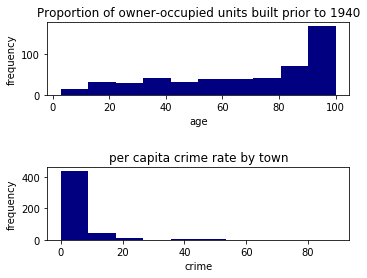

In [34]:
display(HTML("""
<h5>Let’s use pandas to visualise this correlation further</h5>
"""
))

#Explore the data
plt.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=None, hspace=1)
plt.subplot(211)
#===== AGE
plt.subplot(2, 1, 1)
df_boston['age'].plot.hist(title='Proportion of owner-occupied units built prior to 1940',
                            colormap='jet')
plt.xlabel('age')
plt.ylabel('frequency')
#===== 
plt.subplot(2, 1, 2)
df_boston['crim'].plot.hist(title="per capita crime rate by town",
                           colormap="jet"
                           )
plt.xlabel("crime")
plt.ylabel("frequency")

In [ ]:

from pandas.plotting import scatter_matrix

columns_visual=['rm','lstat','ptratio']

for col_name in columns_visual:
    plt.figure()
    df_boston.plot.scatter(x=col_name, y='medv', title="Medv and {col_name}".format(col_name=col_name))



scatter_matrix(df_boston[columns_visual],figsize=(15,12),alpha=0.3)
plt.show()

# Creation a prediciton model

In order to mesaure the quality of the developed model I will you R². The Range of this coefficient  is between 0 to 1. 

- 0: A model with a R² is as good as a model which always predict the mean of a traget variable.
- 1: The developed model can perfely predict the target varaible
- 0-1: Can be see as an indicator, what a percentag the target variable can be explaind by the feature which this model uses. 
  

In [ ]:
# Import 'r2_score'

from sklearn.metrics import r2_score

# Split date into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_boston[columns_visual], df_boston['medv'], test_size=0.2, random_state = 42)


In [ ]:
import pydotplus

In [ ]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. 
    Source:https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d     
    """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(r2_score)

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_,grid

# Fit the training data to the model using grid search
reg,grid = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

In [ ]:
grid.grid_scores_

In [ ]:
# Create test data to explore the created model 

#             rm ,lstat,ptratio   
imaginary_data = [[2, 15, 20], 
               [3, 25, 26],
               [6, 5, 9]]  

# Show predictions
for i, price in enumerate(reg.predict(imaginary_data)):
    print("Predicted selling price for test data {}'s : ${:,.2f}".format(i+1, price))

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
dot_data = StringIO()

export_graphviz(reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Model’s Sensitivity

After I found an optimal model I will check the robustness of the developed model. 
It can happen that the optional model is overfiting order underfitting. 

One way to check if the model is robistness of a concept is to created differnt models and see how far the spread is for the same data set ( I will check agains the imaginary_data).




In [ ]:
#1.Step Change the test_split to 
i=0
dict_model={}
df_sens= pd.DataFrame(data={"name":[],"predict_value":[]})
for size_test_split in [0.1,0.15,0.22,0.27]:
    
    X_train, X_test, y_train, y_test = train_test_split(df_boston[columns_visual], df_boston['medv'], test_size=0.2, random_state = 42)
    reg,grid = fit_model(X_train, y_train)
    dict_model[i]={"reg":reg,"grid":grid}
    df_sens = df_sens.append({"name":i,"predict_value":reg.predict([[2, 15, 20]])[0]},ignore_index=True)
    

In [ ]:
 df_sens.append({"name":i,"predict_value":reg.predict([[2, 15, 20]])[0]},ignore_index=True)

In [ ]:
df_sens

In [ ]:
df_boston.plot.scatter(x=df_sens["predict_value"], y=df_sens["predict_value"], title="Medv and rm")


